# Midterm #
## Helena Gray ##
## CDS-101 ##
### March 28 2017 ###

## Dataset Summary ##

This dataset contains crimes committed in the city of Chicago since 2001. The source of the dataset is the Chicago Police Department. The email for the maintainer of the dataset is 'RandD@chicagopolice.org', which is the email of the Research and Development Division of the Chicago police force.
Officially, the dataset is from data.cityofchicago.org. [Chicago Crime Since 2001](https://catalog.data.gov/dataset/crimes-2001-to-present-398a4)

data.cityofchicago.org. (2017). Crimes - 2001 to present [Comma Separate Value file]. Retrieved from https://catalog.data.gov/dataset/crimes-2001-to-present-398a4.

There are 6,291,788 rows in this dataset and there are 22 columns.
The dataset is the crimes in Chicago since 2001. The data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

A description of the columns is as follows:

1. X is the row number of the dataset.
2. ID is the identification number of the incident report
3. Case.Number is another identification tag for each incident report
4. Date is the date and time that the incident happened
5. IUCR is the Illinois Uniform Crime Reporting (IUCR) Codes.
6. Block is the address where the crime occurred. The street number is partially blocked out
7. Primary.Type describes the category of the crime
8. Description is the specific crime committed within the primary type of transgression
9. Location.Description is what type of location the crime was committed in
10. Arrest is whether or not an arrest was made
11. Domestic is whether or not it was a domestic crime
12. Ward is the ward the crime was committed in. A ward is a local authority area, typically used for electoral purposes.
13. Community Area refers to the work of the Social Science Research Committee at the University of Chicago, which divided the city of Chicago into 77 community areas which are officially recognized by the City of Chicago. These community areas correspond roughly to neighborhoods or inter-related neighborhoods within the city.
14. FBI.Code are the FBI codes of the crime.
15. X.Coordinate refers to a horizontal coordinate on a map of the City of Chicago where the crime occurred.
16. Y.Coordinate refers to a vertical coordinate on a map of the City of Chicago where the crime occurred.
17. Year is the year in which the offense occurred.
18. Updated.On refers to when this particular offense was updated or appended to the dataset.
19. Latitude refers to the latitudinal coordinate of the offense.
20. Longitude refers to the longitudinal coordinate of the offense.
21. Location combines the columns of Latitude and Longitude to give a geographic location.

The code below imports the dataset as a comma separated value file and assigns it to a variable named 'chicago.crime' and call the tidyverse and lubridate packages. The dataset should be in the folder of the working directory before attempting to import. Prior to importing, the dataset was significantly reduced in size so it was possible to import.

In [30]:
# Set the location for R packages
.libPaths(new = "~/Rlibs")
# Load the Tidyverse packages
library(tidyverse)
library(lubridate)
chicago.crime<-read.csv("ChicagoCrime.csv")

## Cleaning the Dataset ##

- I cleaned the dataset which originally had 6,291,788 rows and 22 columns to only include the years 2015 to 2017. This reduced the dataset to 577,130 rows. I did this in RStudio outside of SageMathCloud.

- I then removed columns which would not be needed for my analysis including X, Case.Number, Updated.On, Location, X.Coordinate, Y.Coordinate, ID, Case.Number, FBI.Code, Block, Beat, Latitude, Longitude, and Location. Some of these columns had values of "NA", "NULL", or "NaN" such as "Ward", "X.Coordinate", "Y.Coordinate", "Latitude", and "Longitude" but were removed as they were not necessary for this analysis.

- I separated the column "Date" into 2 separate columns, "DateTime" and "TimeofDay".

- I mutated the column "DateTime" into a dateTime format that could be referenced.

- I checked again for values in columns of NA, NULL, or NaN prior to data analysis.

The code below checks to see if there are any 'NA', NULL, or 'NaN' values first by using the apply() function. 
Then, it removes the columns that are unnecessary for this analysis by subsetting the tibble using the subset function() and using a negative index to combine the columns and remove them. 
The 'Date' column is separated into 'DateTime' and the 'TimeofDay' (which is AM or PM) using the separate() function. This is for ease of analysis. The final line of code converts the 'DateTime' column into the type 'datetime' and format of month-day-year hour-minute-second using the mutate() function. All of these actions assign the result to a variable named 'chicago.crime.test' for each new operation applied to the dataset. Finally, the code to check for NULL or NA values is repeated to confirm a 'clean' dataset and the top of the dataset is shown using the head() function. The dataset appears to conform to 'tidy' data principles.

In [74]:
apply(chicago.crime, 2, function(x) any(is.na(x) | is.null(x) | is.nan(x)))

chicago.crime.test<-subset(chicago.crime, select = -c(X,Case.Number,Updated.On,Location,X.Coordinate,Y.Coordinate,ID,Case.Number,Beat,Latitude,Longitude,Location,Ward,FBI.Code, District))
chicago.crime.test<-separate(chicago.crime.test,Date,c("DateTime","TimeOfDay"),sep=-3,convert=TRUE)
chicago.crime.test<-mutate(chicago.crime.test, DateTime= mdy_hms(chicago.crime.test$DateTime))
apply(chicago.crime.test, 2, function(x) any(is.na(x) | is.null(x) | is.nan(x)))
head(chicago.crime.test)

X                   ID          Case.Number 
               FALSE                FALSE                FALSE 
                Date                Block                 IUCR 
               FALSE                FALSE                FALSE 
        Primary.Type          Description Location.Description 
               FALSE                FALSE                FALSE 
              Arrest             Domestic                 Beat 
               FALSE                FALSE                FALSE 
            District                 Ward       Community.Area 
               FALSE                 TRUE                FALSE 
            FBI.Code         X.Coordinate         Y.Coordinate 
               FALSE                 TRUE                 TRUE 
                Year           Updated.On             Latitude 
               FALSE                FALSE                 TRUE 
           Longitude             Location 
                TRUE                FALSE

DateTime            TimeOfDay                Block 
               FALSE                FALSE                FALSE 
                IUCR         Primary.Type          Description 
               FALSE                FALSE                FALSE 
Location.Description               Arrest             Domestic 
               FALSE                FALSE                FALSE 
      Community.Area                 Year 
               FALSE                FALSE

DateTime            TimeOfDay Block                IUCR
1 2016-04-14 06:25:00 PM        004XX E 46TH ST      143A
2 2016-04-17 02:00:00 PM        070XX S ELIZABETH ST 2820
3 2016-03-20 05:00:00 PM        013XX W 81ST ST      0560
4 2016-04-18 04:48:00 PM        007XX E 50TH ST      0470
5 2016-04-18 11:01:00 PM        070XX S STATE ST     0484
6 2016-04-19 12:40:00 AM        009XX W 95TH ST      1310
  Primary.Type           Description                 Location.Description
1 WEAPONS VIOLATION      UNLAWFUL POSS OF HANDGUN    SIDEWALK            
2 OTHER OFFENSE          TELEPHONE THREAT            RESIDENCE           
3 ASSAULT                SIMPLE                      RESIDENCE           
4 PUBLIC PEACE VIOLATION RECKLESS CONDUCT            STREET              
5 BATTERY                PRO EMP HANDS NO/MIN INJURY SIDEWALK            
6 CRIMINAL DAMAGE        TO PROPERTY                 RESIDENCE           
  Arrest Domestic Community.Area Year
1 true   false    38             2016
2 true   true     67             2016
3 true   true     71             2016
4 true   false    38             2016
5 true   false    69             2016
6 true   false    73             2016

## Exploratory Data Analysis and Visualisation ##

### Data Transformation ###

The code below creates a new column using the mutate() function as well as arithmetic operations.
  
The new column shows the proportion of certain crimes by counting number of crimes of specific type and dividing that amount by the total amount of crimes for that year.
First it groups the dataset by year and primary type of crime. Then, a column representing the count of total crimes for each category for each year is created and called 'count' and the tibble is organized in descending order of number of crimes. Finally a new column is created called "Proportion" that represents how many crimes out of the total number of crimes for that year were of a certain category.

In [19]:
by_type<-group_by(chicago.crime.test,Year,Primary.Type)
by_type<-arrange(summarize(by_type, count=n()),desc(count))
by_type<-mutate(by_type, Proportion=count/sum(count))

by_type

Year Primary.Type                      count Proportion  
1  2016 THEFT                             61365 0.23018666  
2  2015 THEFT                             57303 0.21778111  
3  2016 BATTERY                           50258 0.18852311  
4  2015 BATTERY                           48905 0.18586435  
5  2016 CRIMINAL DAMAGE                   30998 0.11627680  
6  2015 CRIMINAL DAMAGE                   28670 0.10896086  
7  2015 NARCOTICS                         23835 0.09058536  
8  2016 ASSAULT                           18721 0.07022447  
9  2016 DECEPTIVE PRACTICE                17709 0.06642835  
10 2015 OTHER OFFENSE                     17537 0.06664969  
11 2016 OTHER OFFENSE                     17123 0.06423020  
12 2015 ASSAULT                           17040 0.06476083  
13 2015 DECEPTIVE PRACTICE                15465 0.05877502  
14 2016 BURGLARY                          14272 0.05353579  
15 2015 BURGLARY                          13183 0.05010223  
16 2016 NARCOTICS                         12758 0.04785662  
17 2016 ROBBERY                           11956 0.04484823  
18 2016 MOTOR VEHICLE THEFT               11341 0.04254130  
19 2017 THEFT                             10868 0.22918600  
20 2015 MOTOR VEHICLE THEFT               10073 0.03828262  
21 2015 ROBBERY                            9639 0.03663320  
22 2017 BATTERY                            8532 0.17992408  
23 2015 CRIMINAL TRESPASS                  6401 0.02432712  
24 2016 CRIMINAL TRESPASS                  6307 0.02365823  
25 2017 CRIMINAL DAMAGE                    5273 0.11119781  
26 2017 OTHER OFFENSE                      3456 0.07288064  
27 2016 WEAPONS VIOLATION                  3434 0.01288130  
28 2015 WEAPONS VIOLATION                  3362 0.01277734  
29 2017 ASSAULT                            3194 0.06735555  
30 2017 DECEPTIVE PRACTICE                 3085 0.06505694  
⋮  ⋮    ⋮                                 ⋮     ⋮           
66 2017 SEX OFFENSE                       139   2.931253e-03
67 2016 INTIMIDATION                      130   4.876439e-04
68 2015 INTIMIDATION                      121   4.598627e-04
69 2017 HOMICIDE                          118   2.488402e-03
70 2017 ARSON                              93   1.961198e-03
71 2016 OBSCENITY                          54   2.025598e-04
72 2017 LIQUOR LAW VIOLATION               51   1.075496e-03
73 2016 NON-CRIMINAL                       48   1.800531e-04
74 2015 OBSCENITY                          46   1.748238e-04
75 2017 STALKING                           37   7.802615e-04
76 2016 CONCEALED CARRY LICENSE VIOLATION  36   1.350398e-04
77 2015 CONCEALED CARRY LICENSE VIOLATION  34   1.292176e-04
78 2017 INTIMIDATION                       26   5.482919e-04
79 2017 KIDNAPPING                         26   5.482919e-04
80 2015 NON - CRIMINAL                     20   7.601037e-05
81 2015 NON-CRIMINAL                       15   5.700778e-05
82 2015 PUBLIC INDECENCY                   14   5.320726e-05
83 2015 HUMAN TRAFFICKING                  13   4.940674e-05
84 2017 CONCEALED CARRY LICENSE VIOLATION  12   2.530578e-04
85 2017 GAMBLING                           12   2.530578e-04
86 2016 HUMAN TRAFFICKING                  11   4.126217e-05
87 2016 PUBLIC INDECENCY                   10   3.751107e-05
88 2017 OBSCENITY                          10   2.108815e-04
89 2015 OTHER NARCOTIC VIOLATION            5   1.900259e-05
90 2016 NON - CRIMINAL                      5   1.875553e-05
91 2016 OTHER NARCOTIC VIOLATION            4   1.500443e-05
92 2017 NON-CRIMINAL                        4   8.435259e-05
93 2017 PUBLIC INDECENCY                    2   4.217630e-05
94 2016 NON-CRIMINAL (SUBJECT SPECIFIED)    1   3.751107e-06
95 2017 NON-CRIMINAL (SUBJECT SPECIFIED)    1   2.108815e-05

As demonstrated above, theft, battery, and criminal damage were the most common crimes committed in the city of Chicago. And actually the number of these categories of crimes rose slightly from 2015 to 2016.

The code below uses the group_by() function to group the dataset by Community.Area and then summarize to count the total amount of crimes for each community area for each year.


In [36]:
by_community<-group_by(chicago.crime.test,Year,Community.Area)
by_community<-arrange(summarize(by_community, count=n()),desc(count))
by_community


Year Community.Area count
1   2015 25             17309
2   2016 25             16530
3   2016  8             10503
4   2016 28              9395
5   2015 43              9048
6   2015  8              9047
7   2016 32              8977
8   2016 29              8620
9   2015 29              8364
10  2016 24              8195
11  2015 23              8166
12  2016 43              8113
13  2016 23              7956
14  2015 28              7920
15  2015 71              7825
16  2015 32              7579
17  2016 71              7550
18  2015 67              7517
19  2015 68              7225
20  2015 24              7060
21  2016 67              6943
22  2016 49              6826
23  2015 69              6749
24  2015 49              6614
25  2016 69              6545
26  2016 68              6221
27  2016 44              6205
28  2015 66              6199
29  2016  6              6047
30  2015 44              6025
⋮   ⋮    ⋮              ⋮    
203 2017 51             299  
204 2017 17             286  
205 2017 76             281  
206 2017 39             274  
207 2017 60             274  
208 2015  9             256  
209 2017 45             256  
210 2017 54             240  
211 2017 48             229  
212 2017 52             227  
213 2017 11             221  
214 2017 62             218  
215 2017  5             216  
216 2017 59             211  
217 2017 10             200  
218 2017 50             192  
219 2017 13             178  
220 2017 34             163  
221 2017 72             161  
222 2017 57             160  
223 2017 64             148  
224 2017 18             138  
225 2017 37             136  
226 2017 55             131  
227 2017 36             110  
228 2017 74             104  
229 2017 12              83  
230 2017  9              58  
231 2017 47              50  
232 2015  0               2

25,8,28,43,29 are some communities with the consistently high amounts of crimes for 2016 and 2015.


The two most noticeable community areas with consistently high amounts of crimes for 2016 and 2015 are 25 and 8.
Community Area 25 corresponds to 'Austin' neighborhood in Chicago.
Community Area 8 corresponds to 'Near Northside' neighborhood in Chicago.


The code below first filters the dataset to only show homicides for the years 2016 and 2015 using the filter() function and specifying the 'Year' and 'Primary.Type'.

In [37]:
count(filter(chicago.crime.test, Year=='2015' & Primary.Type == "HOMICIDE"))

count(filter(chicago.crime.test, Year=='2016' & Primary.Type == "HOMICIDE"))



n  
1 498

n  
1 781

It appears that in general homicides have been on the rise recently.

_ Key Questions _
 
 - Do crimes tend to rise during summer? 
 Yes. Especially during June, July, and August.
 
 - What drugs were being manufactured/delivered in Chicago in 2016? 
 Mainly white heroin, crack, and marijuana under 10 grams. However, marijuana over 10 grams is on the rise in 2016.
 
 - Neighbors with most crimes? How many crimes typically? 
 The community area "Austin" had around 45 crimes a day in 2016 and Community Area 'Near Northside' had around 28 crimes a day in 2016.
 
 [Map of Neighborhoods](https://www.google.com/maps/d/u/0/viewer?mid=1O-3Uot4mSetKW-M_govahruUjDc&hl=en_US&ll=41.89448305764837%2C-87.77320850000001&z=10)

  
 Is Trump right to demand that "Chicago fix the horrible "carnage" going on, 228 shootings in 2017 with 42 killings (up 24% from 2016)?" Should he "send in the feds"?
 
 - How many homicides happened in 2017 from January 1st to when Trump tweeted this? How many homicides in this same time period for 2016?
 From January 1st to January 24th, there were 37 homicides in 2016 and 45 homicides in 2017.
 
 - How many crimes involving handguns or 'shootings' have happened in 2017 during this time period?
 According to the data, not only were there no 'shootings' in 2017 but there were no crimes related to handguns at all in 2017.
 
 


### Data visualization ###

 The code below filters the dataset to only show homicides using the filter() function. It then separates the 'DateTime' column into two columns 'Date' and 'Time using the separate() function. Finally, it separates the 'Date' column into 3 different columns 'Year1','Month', and 'Day'. The 'Year1' column was not removed because the end goal was to make a plot, therefore the 'tidyness' of the dataset was not a priority. The dataset was then grouped by the Year, Month, and Primary Type using the group_by() dataset. This dataset was then summarized to count the number of homicides that happened each month for each year.
 
A plot was then made to show the number of homicides for each month for each year, using different colors for different years.
 
 
This plot is a representation of a correlation between homicides and months. It does appear as if homicides go up during the summer or hotter months, specifically June, July, and August.


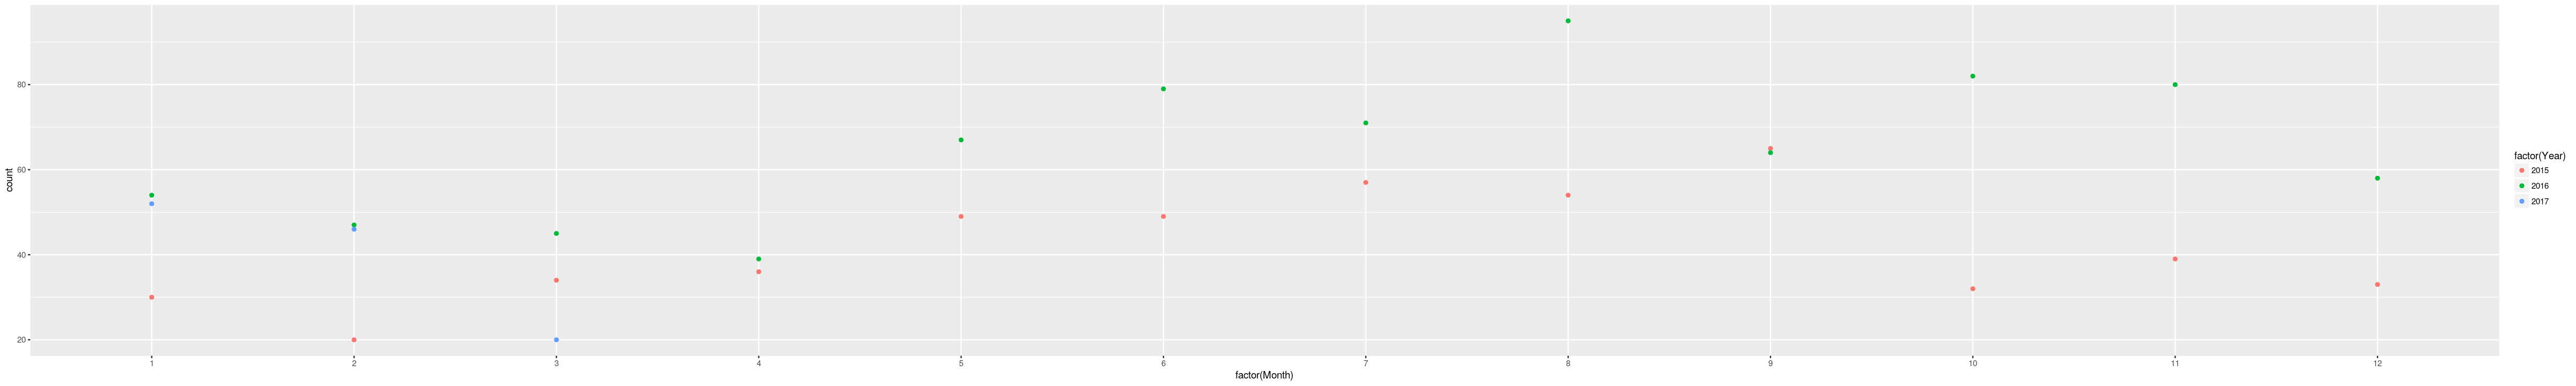

In [39]:
chicago.crime.test.scatter<-filter(chicago.crime.test, (Primary.Type == 'HOMICIDE' ))
chicago.crime.test.scatter<-separate(chicago.crime.test.scatter,DateTime,c("Date","Time"),sep=" ",convert=TRUE)
chicago.crime.test.scatter<-separate(chicago.crime.test.scatter,Date,c("Year1","Month","Day"),sep="-",convert=TRUE)

by_month<-group_by(chicago.crime.test.scatter,Year,Month)
#head(by_month)
by_month<-arrange(summarize(by_month, count=n()))
#by_month

first.plot<- ggplot(data=by_month) + geom_point(mapping= aes(x=factor(Month),y=count,colour = factor(Year)))

first.plot



The code below alters the dataset to separate the 'DateTime' column into two separate columns 'Date' and 'Time' and assigns it to a variable 'chicago.crime.test.narc' using the separate() function.
It then filters the new dataset to only show those offenses that happened in the year 2016 and were drug-related using the filter() function.
The filter() function is used again to filter the previously created dataset to only show the offenses that contained the string 'MANU' in the description of the crime to represent only drug-related crimes that were manufacturing and distributing drugs.

The code then separates the 'Date' column into three separate columns 'Year1','Month', and 'Day'. 'Year1' column was not removed as the ultimate goal was a graph, and thus the 'tidyness' of the tibble was not a priority.

The code then uses the group_by() function to group the dataset by year, month, and description and finally uses the summarize() and arrange() functions to count the number of crimes per category per month and then organizes the tibble in descending order of number of crimes. The top of the tibble is shown using the head() function. It appears as if the main drug being distributed in Chicago is 'white heroin'.

In [68]:

chicago.crime.test.narc<-separate(chicago.crime.test,DateTime,c("Date","Time"),sep=" ",convert=TRUE)
chicago.crime.test.narc<-filter(chicago.crime.test.narc, (Year == '2016' & Primary.Type == 'NARCOTICS'))
chicago.crime.test.narc<-filter(chicago.crime.test.narc, grepl('MANU', Description))
chicago.crime.test.narc<-separate(chicago.crime.test.narc,Date,c("Year1","Month","Day"),sep="-",convert=TRUE)

by_date_and_type<-group_by(chicago.crime.test.narc,Year,Month,Description)
by_date_and_type<-arrange(summarize(by_date_and_type, count=n()),desc(count))
head(by_date_and_type)


Year Month Description                  count
1 2016 1     MANU/DELIVER: HEROIN (WHITE) 138  
2 2016 3     MANU/DELIVER: HEROIN (WHITE) 125  
3 2016 5     MANU/DELIVER: HEROIN (WHITE) 112  
4 2016 2     MANU/DELIVER: HEROIN (WHITE) 109  
5 2016 9     MANU/DELIVER: HEROIN (WHITE) 102  
6 2016 6     MANU/DELIVER: HEROIN (WHITE) 100

The code below takes the tibble 'by_date_and_type' and creates a line graph for each type of offense in manufacturing/distributing drugs over a period of months for 2016 and assigns it to a variable 'q'. The options() function controls the height and width of the graph display window.

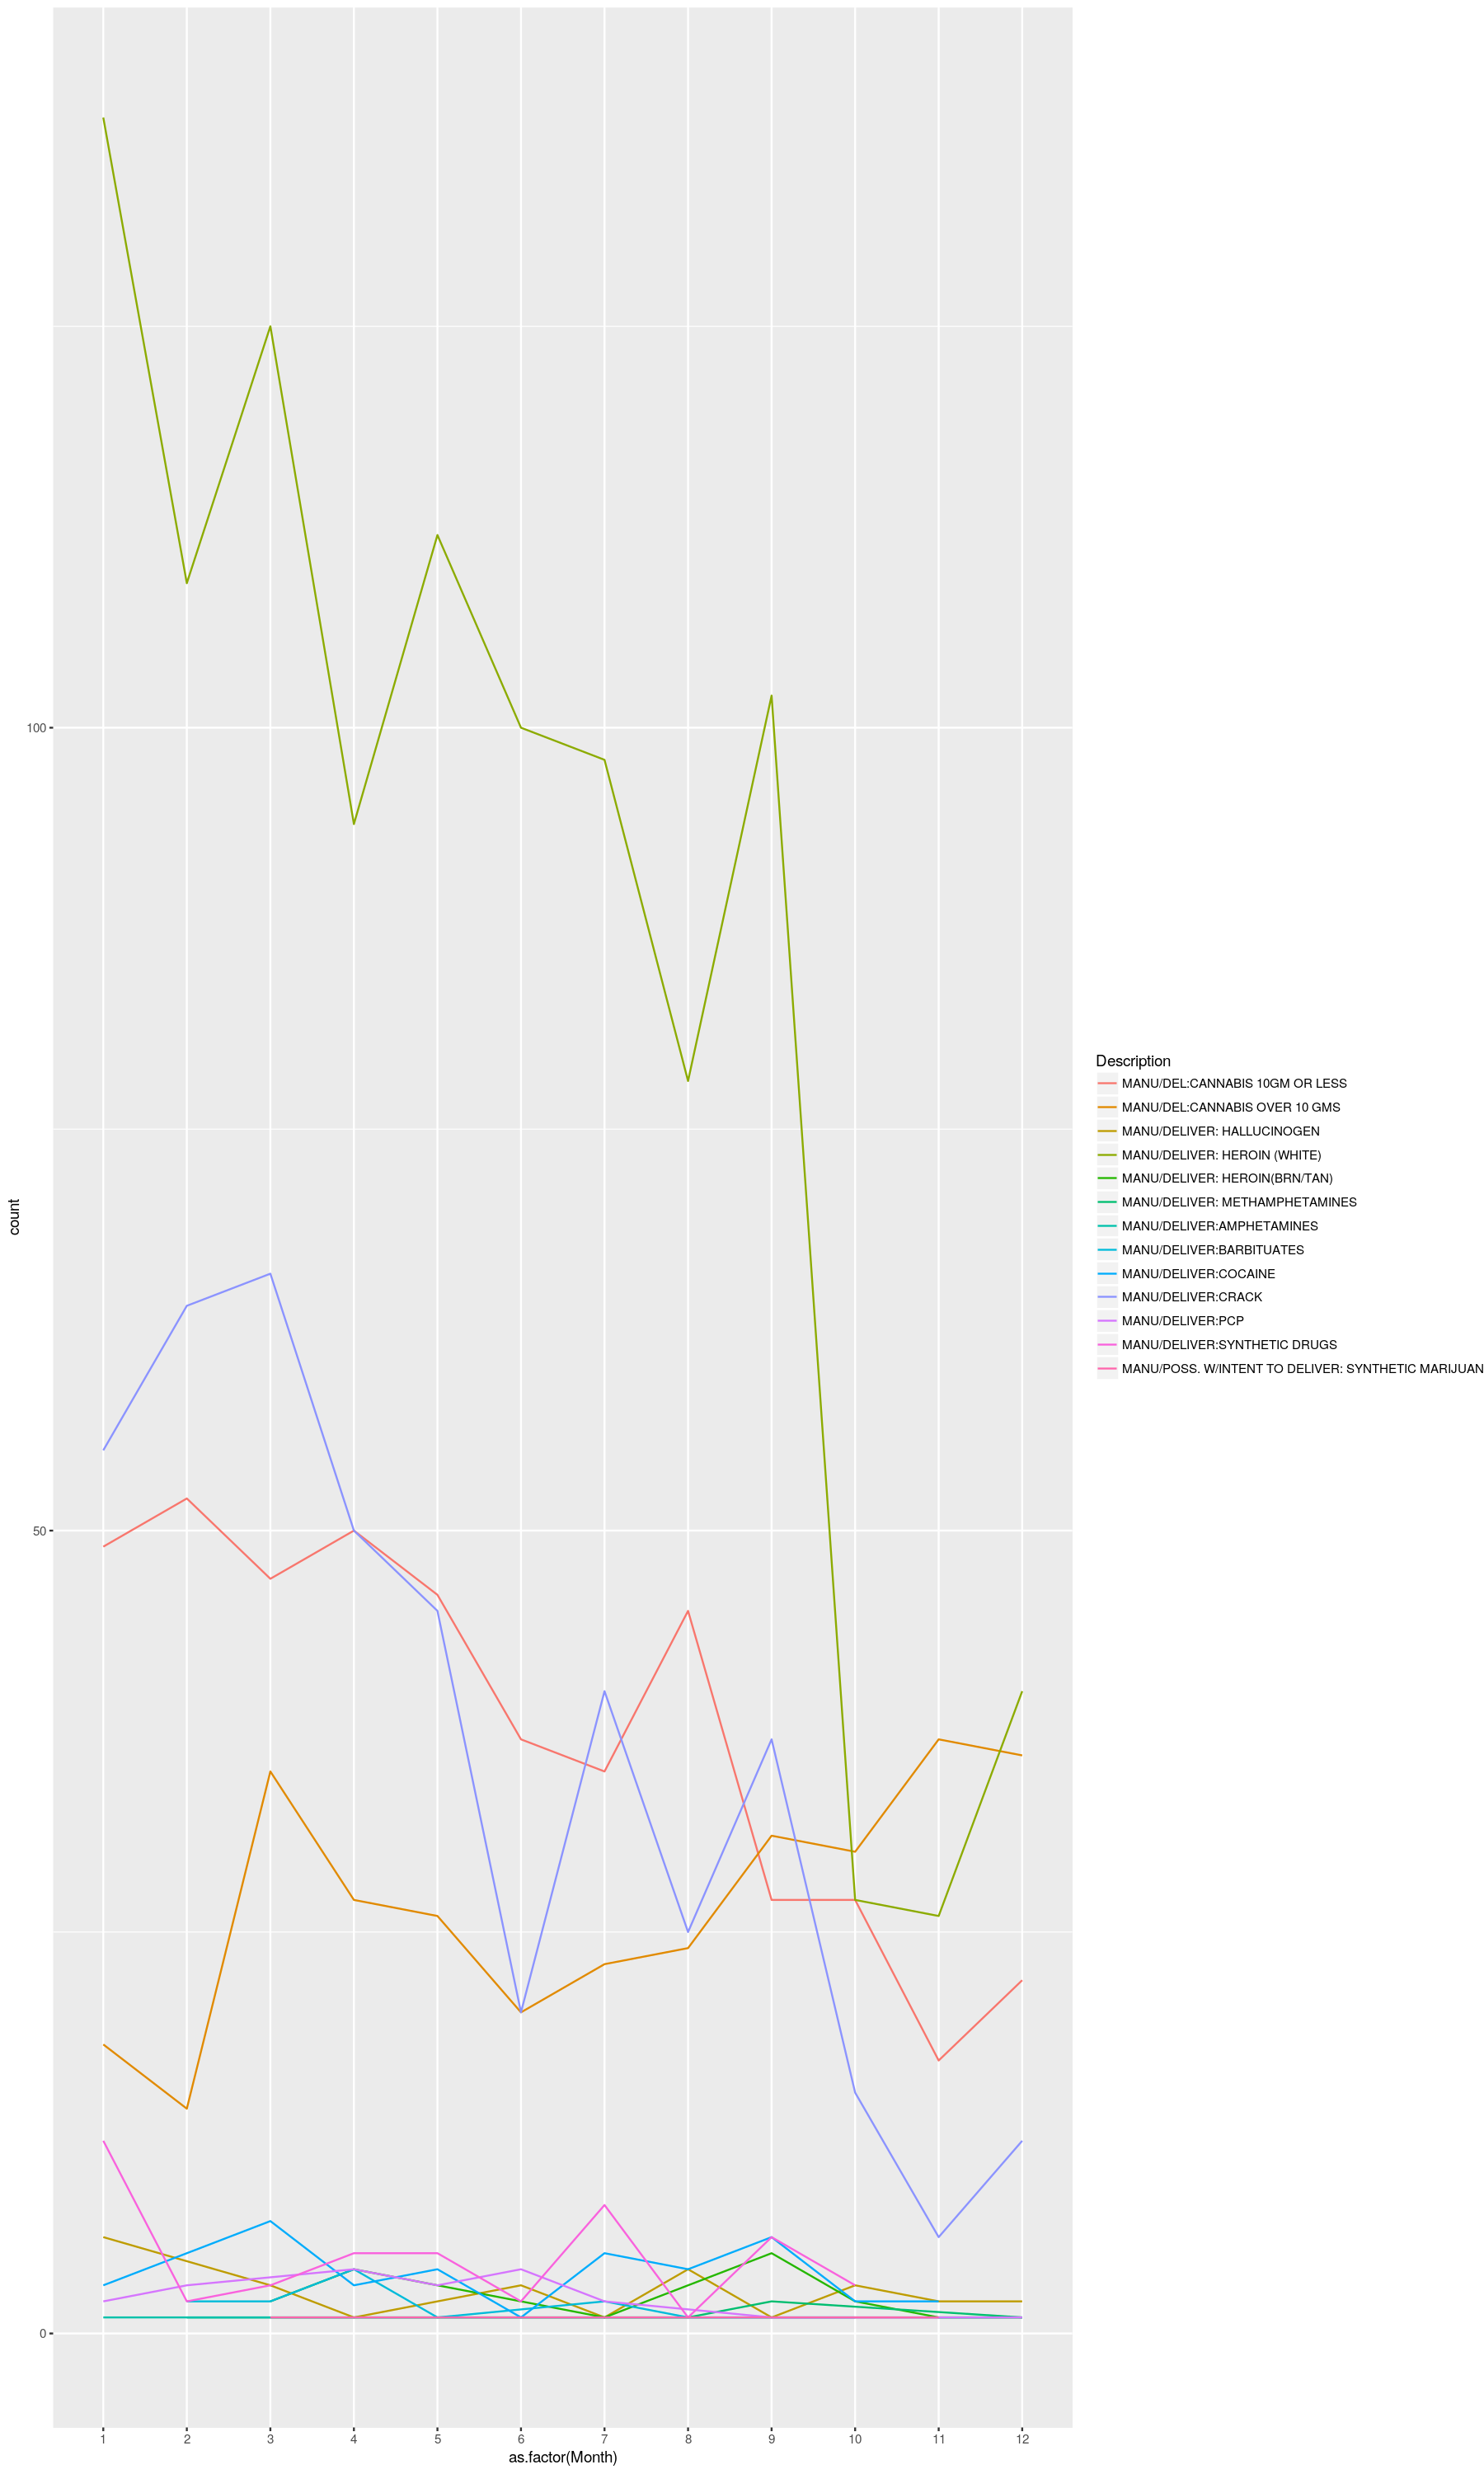

In [67]:

options(repr.plot.width = 15, repr.plot.height=25)

q<-ggplot(data=by_date_and_type,aes(x=as.factor(Month), y=count, colour=Description)) + geom_line(aes(group=Description))
q

The graph shows that initially there was a large amount of 'white heroin' being distributed in Chicago at the beginning of 2016 and swiftly declined near the end of 2016 while the manufacture/distribution of marijuana in quantities over 10 grams rose as the year went on.

The code below separates the dataset column 'Date' into two separate columns 'Date' and 'Time by using the separate() function and then filters the dataset to show only data for the year 2016 using the filter() function.

The resulting dataset is then grouped by Year, Community.Area, and Date using the group_by() function. A new column is added counting the number of crimes per day per community area using the summarize() function nested in the arrange() function.

The summarize() function is used again to get summary statistics for the dataset such as the mean, minimum, maximum, upper and lower quartiles, median, variance, and standard deviation of the dataset.

Finally the dataset is arranged in descending order of mean amount of crimes using the arrange() function. The top of this dataset is shown using the head() function.

In [71]:

by_comm<-separate(chicago.crime.test,DateTime,c("Date","Time"),sep=" ",convert=TRUE)
by_comm<-filter(by_comm, Year == '2016')
by_comm<-group_by(by_comm,Year,Community.Area,Date)
by_comm<-arrange(summarize(by_comm, count=n()),desc(count))
by_comm<-summarize(by_comm, mean.comm=sum(count)/length(unique(by_comm$Date)),min.comm=min(count),med.comm=median(count),max.comm=max(count), 
y25=quantile(count, 0.25),y75=quantile(count, 0.75),var.comm=var(count), sd.comm=sd(count))
by_comm<-arrange(by_comm,desc(mean.comm))


head(by_comm)



Year Community.Area mean.comm min.comm med.comm max.comm y25 y75 var.comm
1 2016 25             45.16393  22       45       71       39  51  83.72100
2 2016  8             28.69672  11       28       50       23  34  61.01188
3 2016 28             25.66940   9       25       50       21  29  44.26575
4 2016 32             24.52732   4       24       85       20  28  65.21980
5 2016 29             23.55191   9       23       42       19  27  35.89730
6 2016 24             22.39071   9       22       45       18  26  36.90172
  sd.comm 
1 9.149918
2 7.811010
3 6.653251
4 8.075878
5 5.991435
6 6.074679

The code below is used to create a boxplot for each community showing some of the summary statistics for each community.area for the year of 2016. As is shown by the boxplot the community areas 25, 8, and 28 have very high rates of crime compared to other community areas. ggplot() and geom_boxplot() are used.

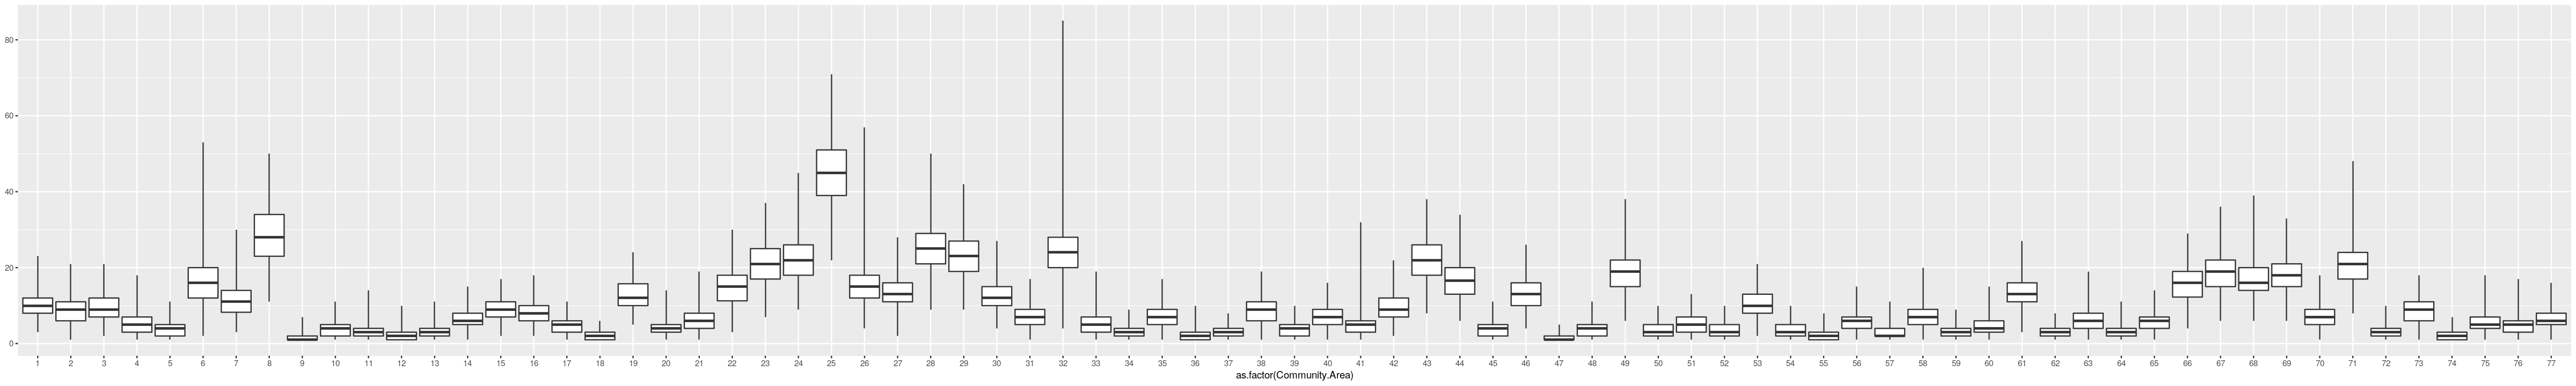

In [9]:
options(repr.plot.width = 40, repr.plot.height=6)
ggplot(by_comm, aes(x = as.factor(Community.Area))) +
  geom_boxplot(aes(
      lower = y25, 
      upper = y75, 
      middle = med.comm, 
      ymin = min.comm, 
      ymax = max.comm),
    stat = "identity")

The code below filters the dataset to only show homicides for 2016 from January 1st to January 24th using the filter() function and finally filters the dataset to show homicides within the same time period for the year January 2017 using the filter() function. This is to check the validity of Trump's claim that homicides in Chicago are up.

In [72]:
count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312015) & as_date(DateTime) <
mdy(01252016))), Primary.Type == 'HOMICIDE'))

count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'HOMICIDE'))


n 
1 37

n 
1 45

This was done to test the validity of a comment Trump made about the rising number of homicides in Chicago. It appears that he was telling the truth, that homicides in Chicago have been on the rise during the time period Trump specified from 2016 to 2017. However, during this time period homicides rose 22% from 2016 not 24% and there were actually 45 homicides rather than 42 in 2017.

The code below is filtered using the filter() function to show different types of crime that were handgun related during the time period Trump suggested that there was 228 shootings.

In [73]:
count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'ATTEMPT AGG: HANDGUN'))

count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'AGGRAVATED PO:HANDGUN'))

count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'ATTEMPT: ARMED-HANDGUN'))

count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'AGG PRO.EMP: HANDGUN'))

count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'AGGRAVATED:HANDGUN'))

count(filter((filter(chicago.crime.test, as_date(DateTime) > mdy(12312016) & as_date(DateTime) <
mdy(01252017))), Primary.Type == 'AGGRAVATED DOMESTIC BATTERY: HANDGUN'))


n
1 0

n
1 0

n
1 0

n
1 0

n
1 0

n
1 0

It appears as if Trump fabricated his data about shootings in Chicago for 2017 as there were no crimes involving handguns from January 1 2017 to the day Trump tweeted that he 'should call in the feds for Chicago'.